# Machine Learning: Assignment 6
## Comparison of Multiple Classification Methods (max. 15p)

The file `data/voice.csv` contains measurement data about voices (field explanations in English).

Try to predict the label value of the field using other fields using different machine learning methods.

Split the data into training data and test data in a ratio of 80/20%.

* Also print how much different fields affect the variable predicted by the model (importances).
* Then choose the two most important explanatory variables and print a scatter diagram from them so that the male and female points are in different colors.

# Assignment 6.1
## Data preprocessing (2 points)

Familiarize yourself with the data and
implement data preprocessing.

In [50]:
# Preprocessing Data

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Loading the dataset
voice_data = pd.read_csv('./data/voice.csv')

# Encoding the 'label' column to numeric values: 'male' -> 1, 'female' -> 0
label_encoder = LabelEncoder()
voice_data['label'] = label_encoder.fit_transform(voice_data['label'])

# Displaying the first few rows to ensure the 'label' column is correctly encoded
voice_data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


# Assignment 6.2
## Training and test data (2 points)

Let's split the data into training and test sets and scale the numerical data.

In [48]:
# Splitting the Data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
X = voice_data.drop('label', axis=1)  # Features
y = voice_data['label']               # Target variable

# Splitting the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Printing the sizes of the split data to verify
print(f"Training Features Shape: {X_train_scaled.shape}")
print(f"Test Features Shape: {X_test_scaled.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Test Labels Shape: {y_test.shape}")


Training Features Shape: (2534, 20)
Test Features Shape: (634, 20)
Training Labels Shape: (2534,)
Test Labels Shape: (634,)


# Assignment 6.3
## Building models (7 points)

Let's run different learning methods on the same data and save the results.
This assignment uses the following methods:

Use the following machine learning methods for classification:

1. Decision Tree (1 p)
2. Support Vector Machine   (1 p)
3. k Nearest Neighbors  (1 p)
4. Gaussian Naive Bayes (1 p)
5. Random Forest (1 p)
6. PCA and classification (2 p)

For all methods, calculate the accuracy and confusion matrix of the classification results.

Let's run different Machine learning methods on the same data and save the results.


### Decision Tree

In [51]:
# Decision Tree Classification Implementation

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initializing the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Training the classifier on the scaled training data
decision_tree.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_dt = decision_tree.predict(X_test_scaled)

# Calculating accuracy and confusion matrix
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Confusion Matrix:\n", conf_matrix_dt)


Decision Tree Accuracy: 0.9668769716088328
Confusion Matrix:
 [[292   5]
 [ 16 321]]


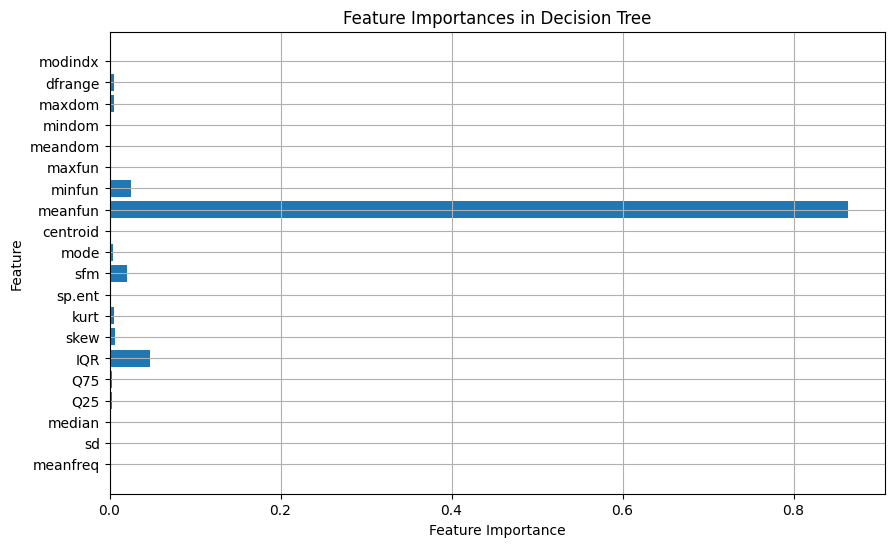

In [52]:
# Cell 4: Feature Importances in Decision Tree Classification

import matplotlib.pyplot as plt

# Get feature importances from the Decision Tree model
importances_dt = decision_tree.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Decision Tree")
plt.barh(range(X_train.shape[1]), importances_dt, align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

### Support Vector Machine

In [7]:
# SVC Classification Implementation

from sklearn.svm import SVC

# Initializing the Support Vector Classifier
svc = SVC(kernel='linear', random_state=42)

# Training the classifier on the scaled training data
svc.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_svc = svc.predict(X_test_scaled)

# Calculating accuracy and confusion matrix
accuracy_svc = accuracy_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

print(f"SVC Accuracy: {accuracy_svc}")
print("Confusion Matrix:\n", conf_matrix_svc)


SVC Accuracy: 0.9763406940063092
Confusion Matrix:
 [[293   4]
 [ 11 326]]


### kNN

In [46]:
# kNN Classification Implementation

from sklearn.neighbors import KNeighborsClassifier

# Initializing the kNN classifier with n_neighbors=5 
knn = KNeighborsClassifier(n_neighbors=5)

# Training the classifier on the scaled training data
knn.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Calculating accuracy and confusion matrix
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"kNN Accuracy: {accuracy_knn}")
print("Confusion Matrix:\n", conf_matrix_knn)


kNN Accuracy: 0.9810725552050473
Confusion Matrix:
 [[291   6]
 [  6 331]]


### Naive Bayes

In [44]:
# Naive Bayes Classification Implementation

from sklearn.naive_bayes import GaussianNB

# Initializing the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training the classifier on the scaled training data
gnb.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_gnb = gnb.predict(X_test_scaled)

# Calculating accuracy and confusion matrix
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb}")
print("Confusion Matrix:\n", conf_matrix_gnb)


Gaussian Naive Bayes Accuracy: 0.9085173501577287
Confusion Matrix:
 [[270  27]
 [ 31 306]]


### Random Forest

In [47]:
# Random Forest Classification Implementation

from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the scaled training data
random_forest.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Calculating accuracy and confusion matrix
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Confusion Matrix:\n", conf_matrix_rf)


Random Forest Accuracy: 0.9842271293375394
Confusion Matrix:
 [[295   2]
 [  8 329]]


### PCA + classifier
PCA with *Random Forest Classifier* or any other classifier you want to use.

In [42]:
# PCA + Selected Classifier

from sklearn.decomposition import PCA

# Initializing PCA, reducing the data to 2 components
pca = PCA(n_components=2)

# Fitting and transform the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transforming the test data
X_test_pca = pca.transform(X_test_scaled)

# Initializing the classifier - using Random Forest as an example
classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the PCA-transformed training data
classifier_pca.fit(X_train_pca, y_train)

# Predictions on the PCA-transformed test set
y_pred_pca = classifier_pca.predict(X_test_pca)

# Calculating accuracy and confusion matrix
accuracy_pca = accuracy_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

print(f"PCA + Random Forest Classifier Classifier Accuracy: {accuracy_pca}")
print("Confusion Matrix:\n", conf_matrix_pca)


PCA + Random Forest Classifier Classifier Accuracy: 0.8233438485804416
Confusion Matrix:
 [[243  54]
 [ 58 279]]


### Visualization

Drawing patterns.
Draw patterns using the two most important explanatory variables

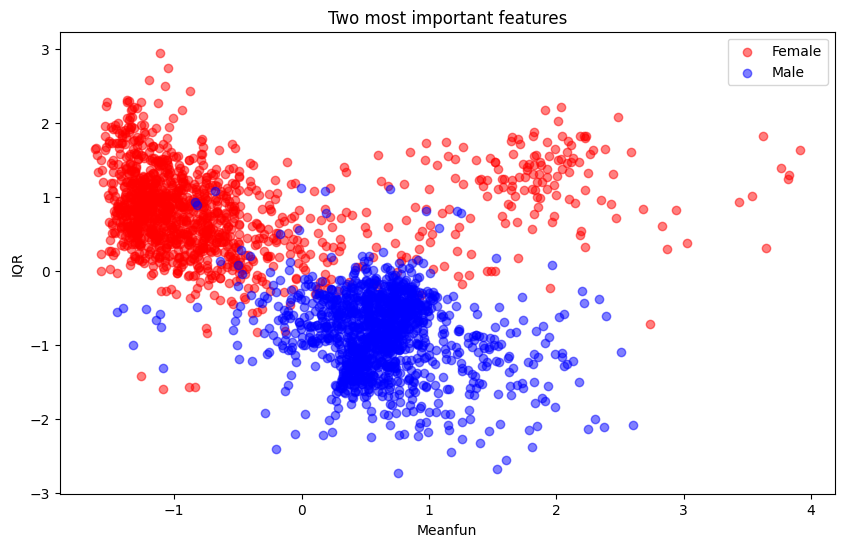

In [39]:
# Draw figure using two most important features

import matplotlib.pyplot as plt
import numpy as np

# Getting the indices of the two most important features
important_indices = np.argsort(random_forest.feature_importances_)[-2:]

# Extracting the two most important features from the training set
X_important_train = X_train_scaled[:, important_indices]
X_important_test = X_test_scaled[:, important_indices]

# Scatter plot of the two most important features
plt.figure(figsize=(10, 6))
plt.scatter(X_important_train[y_train==0][:, 0], X_important_train[y_train==0][:, 1], color='red', label='Female', alpha=0.5)
plt.scatter(X_important_train[y_train==1][:, 0], X_important_train[y_train==1][:, 1], color='blue', label='Male', alpha=0.5)
plt.title('Two most important features')
plt.xlabel('Meanfun')
plt.ylabel('IQR')
plt.legend()
plt.show()


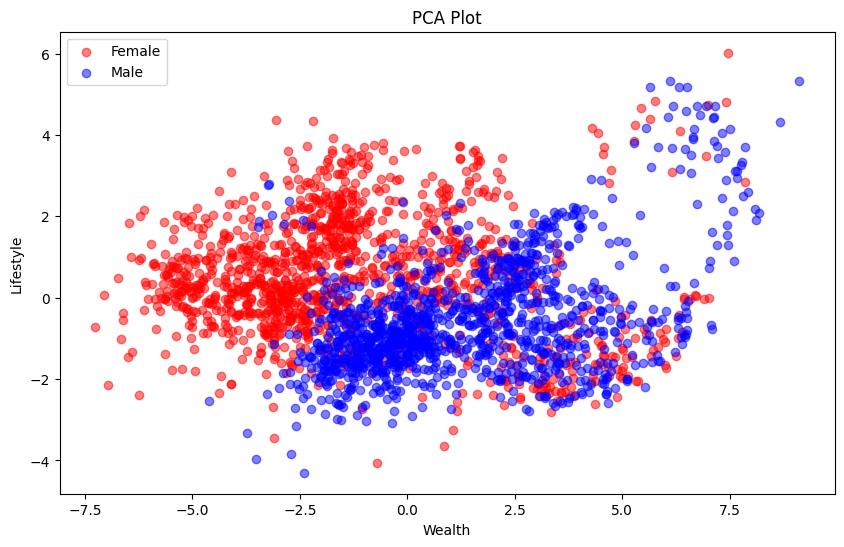

In [37]:
# Draw another figure using PCA components

plt.figure(figsize=(10, 6))

plt.scatter(X_train_pca[y_train==0][:, 0], X_train_pca[y_train==0][:, 1], color='red', label='Female', alpha=0.5)
plt.scatter(X_train_pca[y_train==1][:, 0], X_train_pca[y_train==1][:, 1], color='blue', label='Male', alpha=0.5)

plt.title('PCA Plot')
plt.xlabel('Wealth')
plt.ylabel('Lifestyle')
plt.legend()
plt.show()


# Assignment 6.4
## Analyzing and processing the results (4 p)

* Let's compare the results obtained from different classification methods
* Also try to retrieve the key features
* Draw some suitable figure using the two most important explanatory variables
* Also draw ROC curves (with AUC) when using different methods and compare how different machine learning methods progress.
* Q: How would you develop or improve learning outcomes?


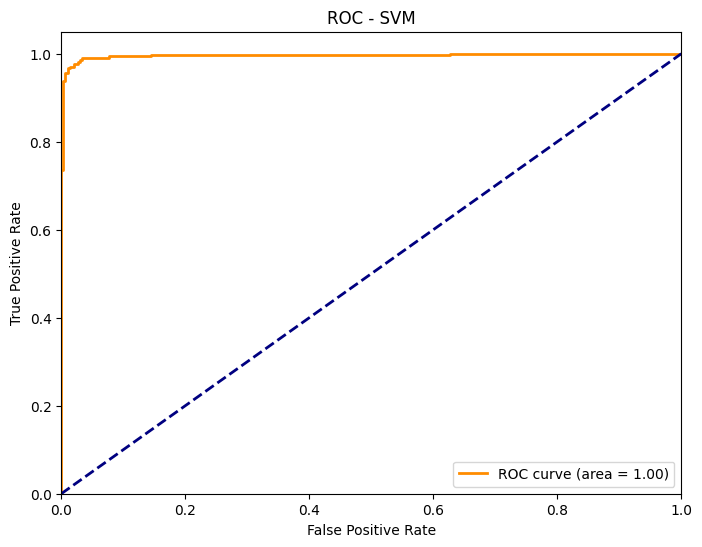

In [35]:
# ROC curve with SVM

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicting probabilities for the test data.
y_scores_svc = svc.decision_function(X_test_scaled)

# Computing ROC curve and ROC area
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_scores_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM')
plt.legend(loc="lower right")
plt.show()


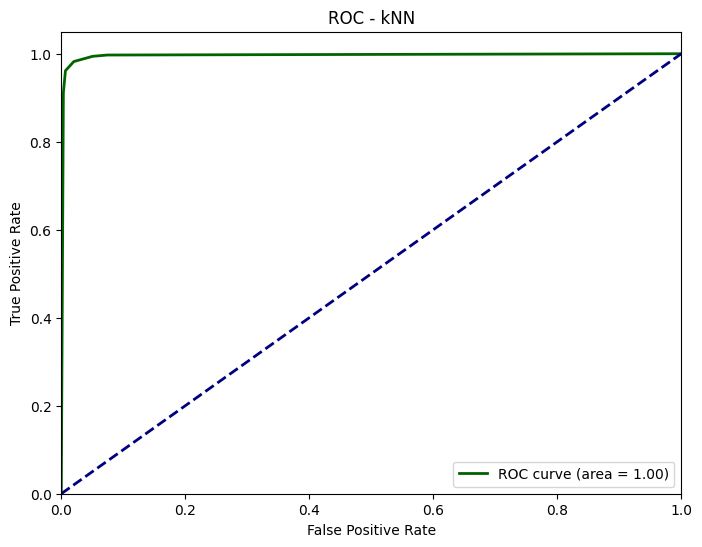

In [34]:
# ROC curve with kNN method

# Predicting probabilities
y_probs_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Computing ROC curve and area
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkgreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - kNN')
plt.legend(loc="lower right")
plt.show()


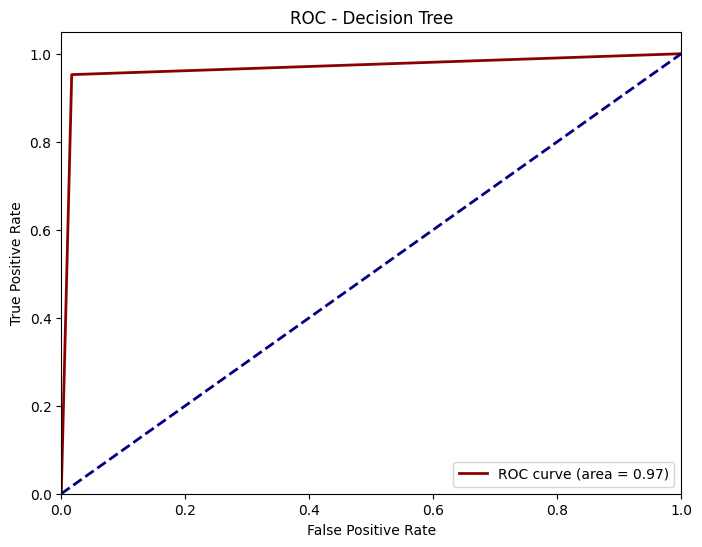

In [33]:
# ROC curve with decision tree method

# Predicting probabilities
y_probs_dt = decision_tree.predict_proba(X_test_scaled)[:, 1]

# Computing ROC curve and area
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree')
plt.legend(loc="lower right")
plt.show()


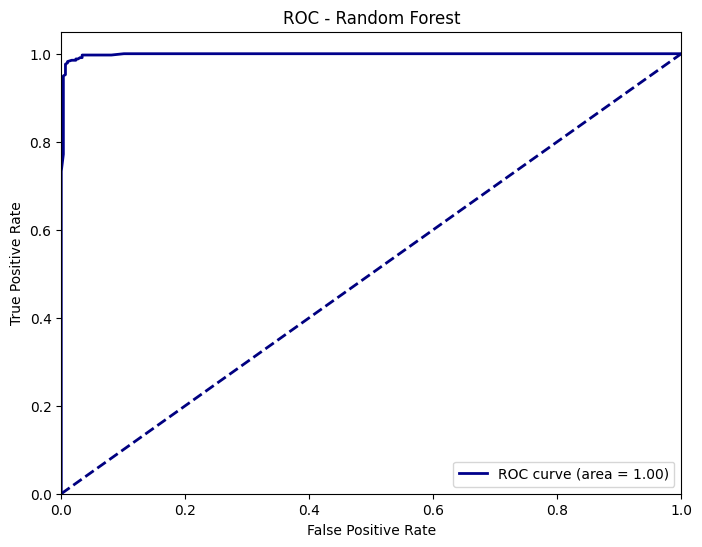

In [30]:
# ROC curve with random forest method

# Predicting probabilities
y_probs_rf = random_forest.predict_proba(X_test_scaled)[:, 1]

# Computing ROC curve and area
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


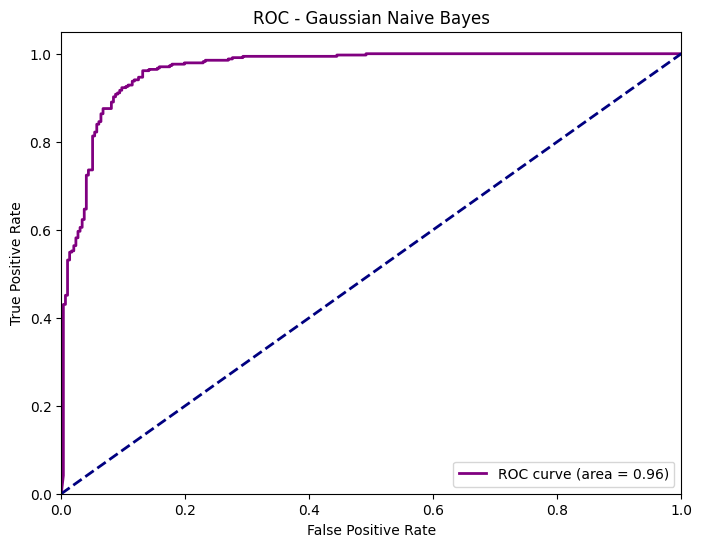

In [31]:
# ROC curve with Bayes method
y_probs_gnb = gnb.predict_proba(X_test_scaled)[:, 1]

# Computing ROC curve and ROC area
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_probs_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()


### Comparison of Different Classification Models

* Compare the classification results of different ML models.
* Are there other good classification methods to apply with this dataset?

# Comparison of the classification results of different ML modelsssification task.

## 1. ROC Curves and AUC Scores:
* Based on the ROC curves the we got as a result of the implementation, it appears that each model has an excellent AUC score, suggesting high model performance. However, in practical scenarios, an AUC of 1.0 might indicate that the model is too good to be true and could be a result of overfitting, a very easy dataset, or a mistake in the validation process.


## 2. Classification Accuracies:

<span style="color:purple;">Random Forest</span> showed the highest accuracy (98.42%), then comes <span style="color:purple;">kNN</span> with (98.11%) and <span style="color:purple;">SVM</span> (97.63%). These models performed way better than the <span style="color:purple;">Gaussian Naive Bayes</span> and <span style="color:purple;">PCA + Classifier</span>.
The <span style="color:purple;">Decision Tree</span> also has high accuracy (96.69%), which is expected as Random Forest is an ensemble of decision trees and typically performs better.
Gaussian Naive Bayes had the lowest accuracy (90.85%), which might be due to the assumption of feature independence in the model, which is often not the case in real-world datasets.
PCA + Classifier had the lowest accuracy (82.33%), which could suggest that reducing the dataset to two principal components might be too aggressive and lose too much information.

## 3. Confusion Matrices
The confusion matrices show the number of true positive, false positive, true negative, and false negative predictions.
A model with few false positives and false negatives, like the Random Forest model in our case, is considered to perform well on classification tasks.

# Are there other good classification methods to apply with this dataset?

* <span style="color:green;">Ensemble Learning:</span> Techniques like Gradient Boosting or Stacking could be tested.
* <span style="color:green;">Deep Learning:</span> Neural networks, especially if you have a large dataset.
* <span style="color:green;">Advanced Algorithms:</span> Like XGBoost or LightGBM, which are gradient boosting frameworks that use tree-based learning algorithms and are known for their performance.